## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn
from keras.applications import VGG16
from keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing.image import img_to_array, array_to_img, smart_resize
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf

## Load Fashion MNIST Data

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# X_train show all train images dataset.

In [4]:
# Print shape of Data
print("Shape of Training Data:", X_train.shape, y_train.shape)
print("Shape of Testing Data:", X_test.shape, y_test.shape)

Shape of Training Data: (60000, 28, 28) (60000,)
Shape of Testing Data: (10000, 28, 28) (10000,)


In [5]:
X_train[0] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
# Define class labels
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [7]:
y_train[1] # 0 => T-shirt/top

0

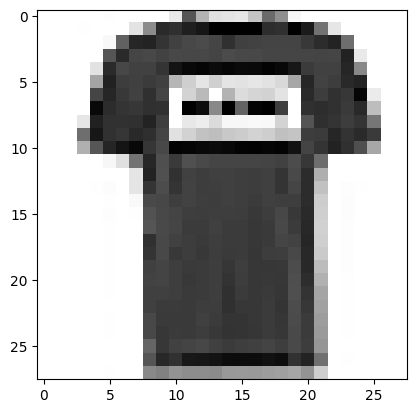

In [8]:
# Show sample images
plt.imshow(X_train[1], cmap='Greys')

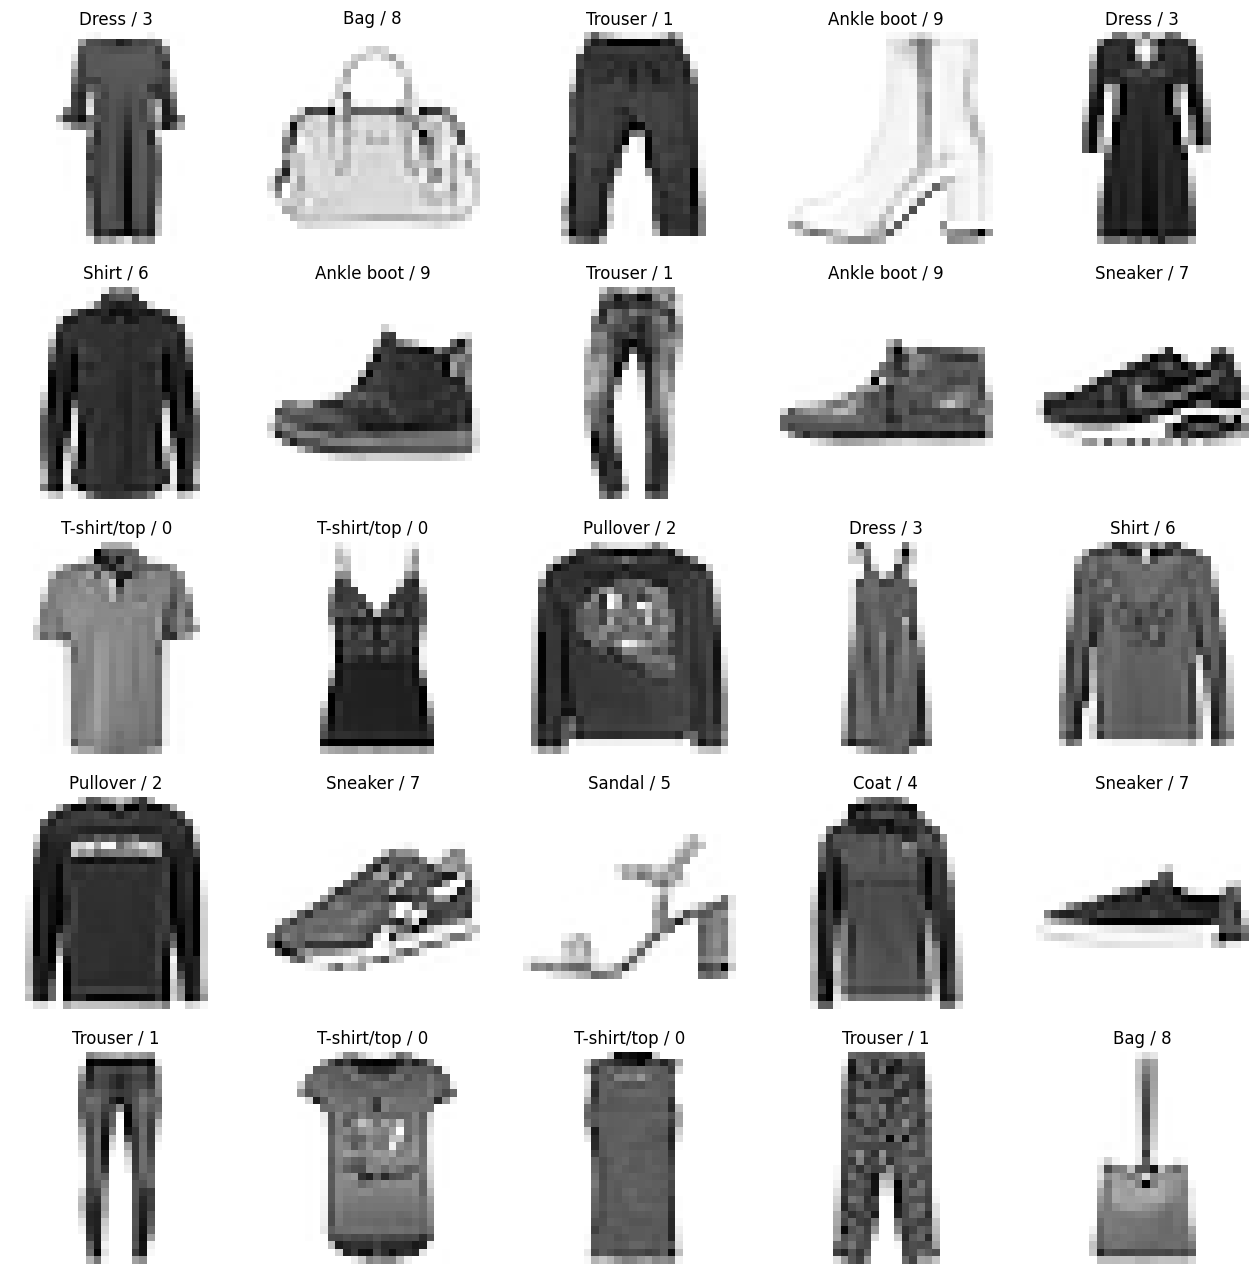

In [9]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0, 1000, 25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis('off') # off the axis
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train.ndim

3

## Change Dimension for CNN
- input Batch size: 1 or more. instances
- Height: The height of each input image. rows
- Width: The width of each input image. columns
- Channels: 1 for grayscale images, 3 for RGB color images.

In [12]:
X_train = np.expand_dims(X_train, -1) # The value -1 indicates the last position where the new axis will be inserted. 
X_test = np.expand_dims(X_test, -1)

In [13]:
X_train.ndim

4

In [14]:
# Feature Scaling/Normalization
X_train = X_train/255
X_test = X_test/255

In [15]:
# Split Dataset
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [16]:
print("Shape of Training Data after Splitting:", X_train.shape, y_train.shape)
print("Shape of Validation Data:", X_validation.shape, y_validation.shape) # used further in cnn model

Shape of Training Data after Splitting: (48000, 28, 28, 1) (48000,)
Shape of Validation Data: (12000, 28, 28, 1) (12000,)


## Convolutional Neural Network - Model Building

In [17]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

cnn_model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compile the CNN model using categorical
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Fit the model to the training data
cnn_model_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - accuracy: 0.6906 - loss: 0.9524 - val_accuracy: 0.8361 - val_loss: 0.4547
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.8545 - loss: 0.4159 - val_accuracy: 0.8718 - val_loss: 0.3693
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.8771 - loss: 0.3525 - val_accuracy: 0.8785 - val_loss: 0.3474
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8903 - loss: 0.3139 - val_accuracy: 0.8831 - val_loss: 0.3361
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.8940 - loss: 0.3024 - val_accuracy: 0.8903 - val_loss: 0.3128
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9020 - loss: 0.2798 - val_accuracy: 0.8938 - val_loss: 0.3023
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9080 - loss: 0.2595 - val_accuracy: 0.8973 - val_loss: 0.2909
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 87ms/step - accuracy: 0.9123 - loss: 0.2452 - val_accuracy: 0.8945 - 

## Test the Model

In [20]:
# model_predict(X_test[0]) it will show error because now error data is 4 dimension.

In [21]:
cnn_model.predict(np.expand_dims(X_test[0], axis = 0)).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98]],
      dtype=float32)

In [22]:
y_test[0]

9

In [23]:
np.argmax(cnn_model.predict(np.expand_dims(X_test[0], axis = 0)).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


9

In [24]:
y_pred = cnn_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [25]:
y_pred.round(2)

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.98, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.3 , 0.06, 0.  ]], dtype=float32)

In [26]:
cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9028 - loss: 0.2778


[0.27885523438453674, 0.8986999988555908]

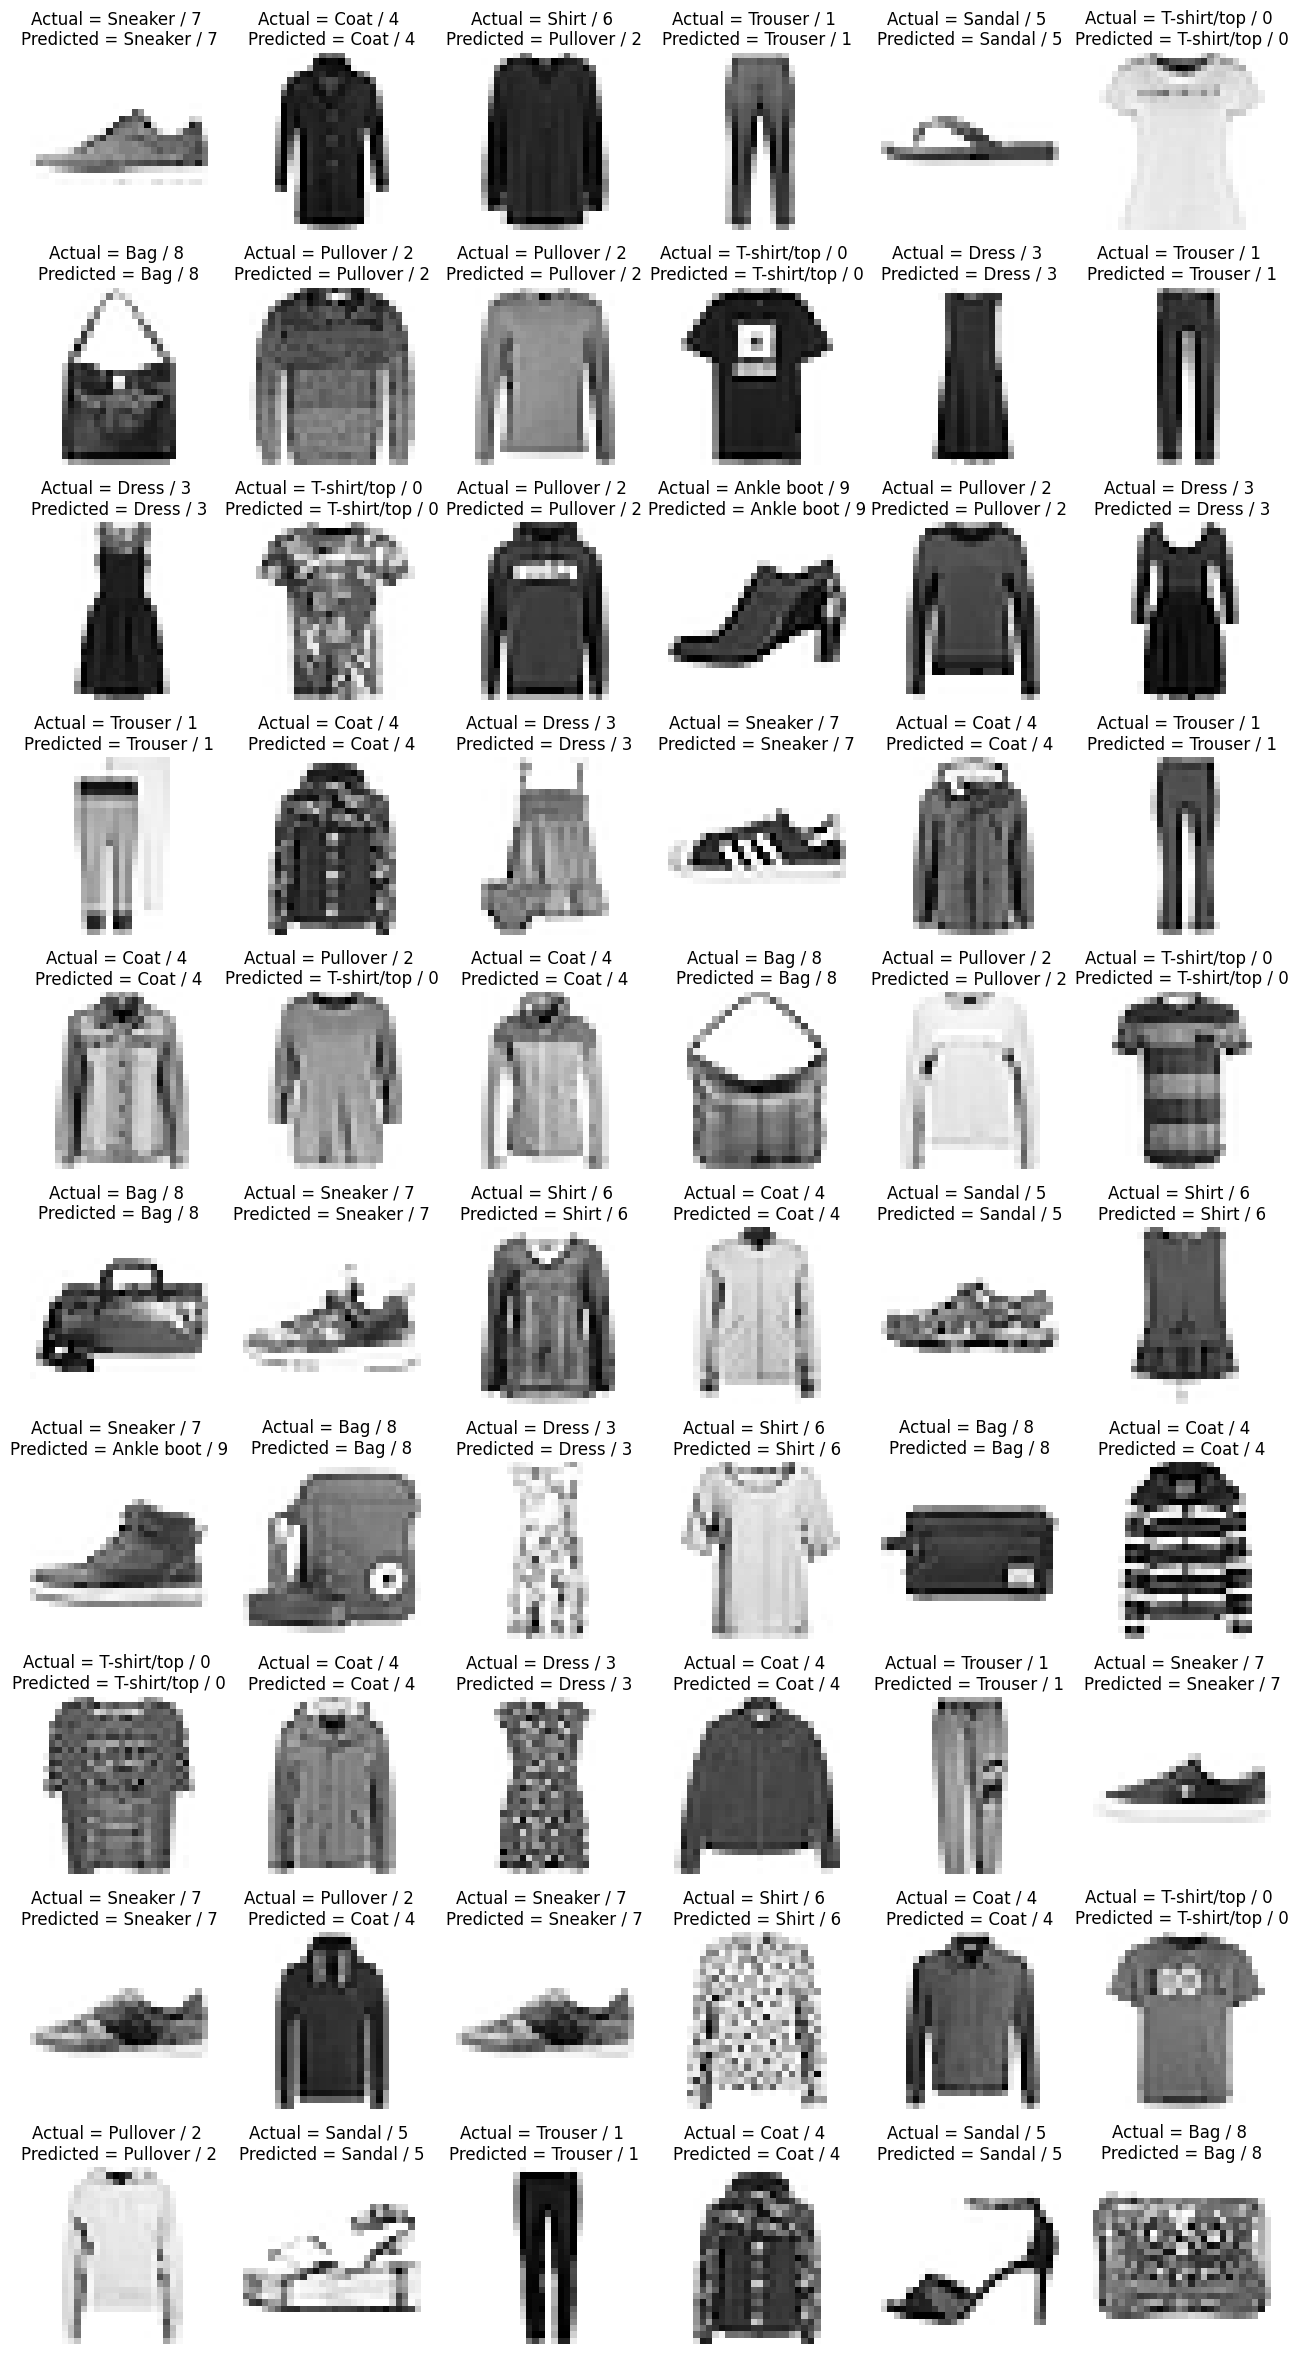

In [27]:
# Visualization
plt.figure(figsize=(16,30))
# Set a seed for reproducibility
np.random.seed(42)
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


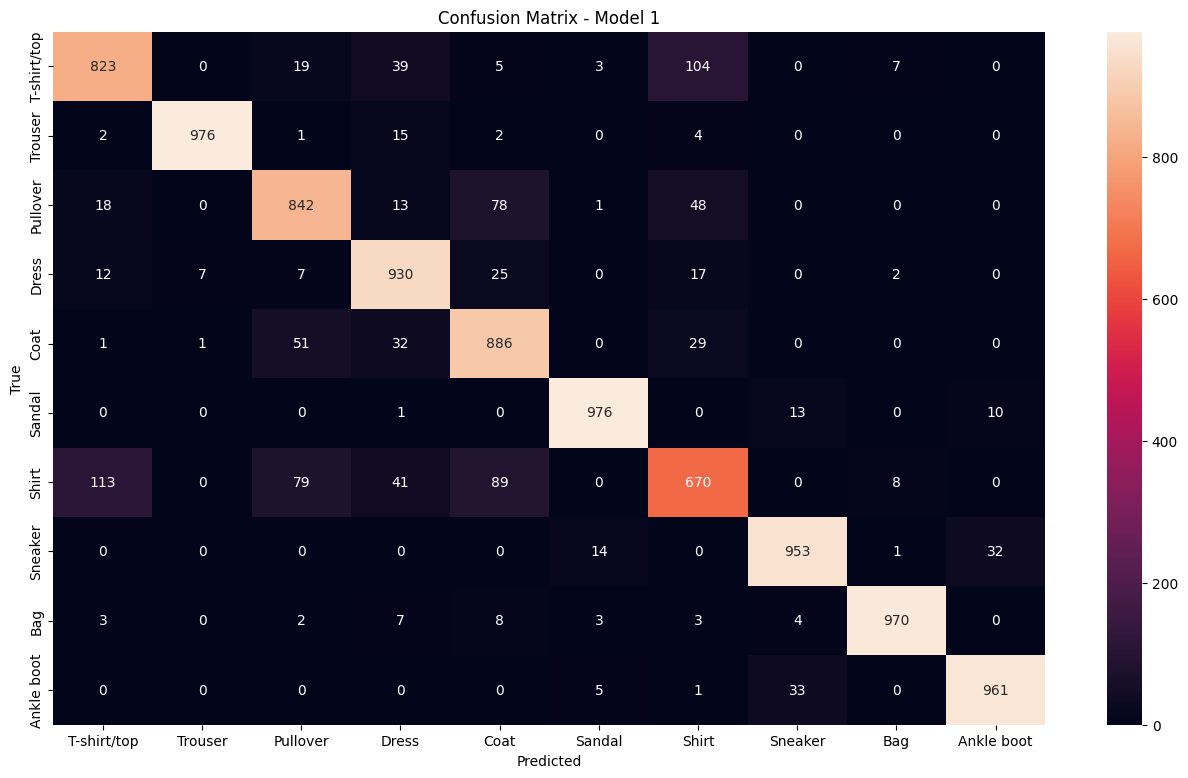

Classification Report for Model 1:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.82      0.83      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.84      0.84      1000
       Dress       0.86      0.93      0.90      1000
        Coat       0.81      0.89      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.76      0.67      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000




In [28]:
# Evaluation for Model 1
y_pred_model1 = cnn_model.predict(X_test)
y_pred_labels_model1 = [np.argmax(label) for label in y_pred_model1]
cm1 = confusion_matrix(y_test, y_pred_labels_model1)

# Plot confusion matrix for Model 1
plt.figure(figsize=(16,9))
sns.heatmap(cm1, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Model 1')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report for Model 1
cr1 = classification_report(y_test, y_pred_labels_model1, target_names=class_labels)
print("Classification Report for Model 1:")
print(cr1)
print()

In [29]:
# Save Model
cnn_model.save('fashion_mnist_cnn_model1.h5')

In [30]:
# Building CNN Model 2
cnn_model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
cnn_model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
cnn_model2_history = cnn_model2.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.4574 - loss: 1.4683 - val_accuracy: 0.7717 - val_loss: 0.5659
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.7818 - loss: 0.5713 - val_accuracy: 0.8273 - val_loss: 0.4616
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.8290 - loss: 0.4641 - val_accuracy: 0.8531 - val_loss: 0.3914
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.8533 - loss: 0.3991 - val_accuracy: 0.8630 - val_loss: 0.3683
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8641 - loss: 0.3655 - val_accuracy: 0.8761 - val_loss: 0.3299
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.8767 - loss: 0.3351 - val_accuracy: 0.8789 - val_loss: 0.3235
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.8801 - loss: 0.3233 - val_accuracy: 0.8842 - val_loss: 0.3129
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - accuracy: 0.8885 - loss: 0.3013 - val_accuracy: 0.888

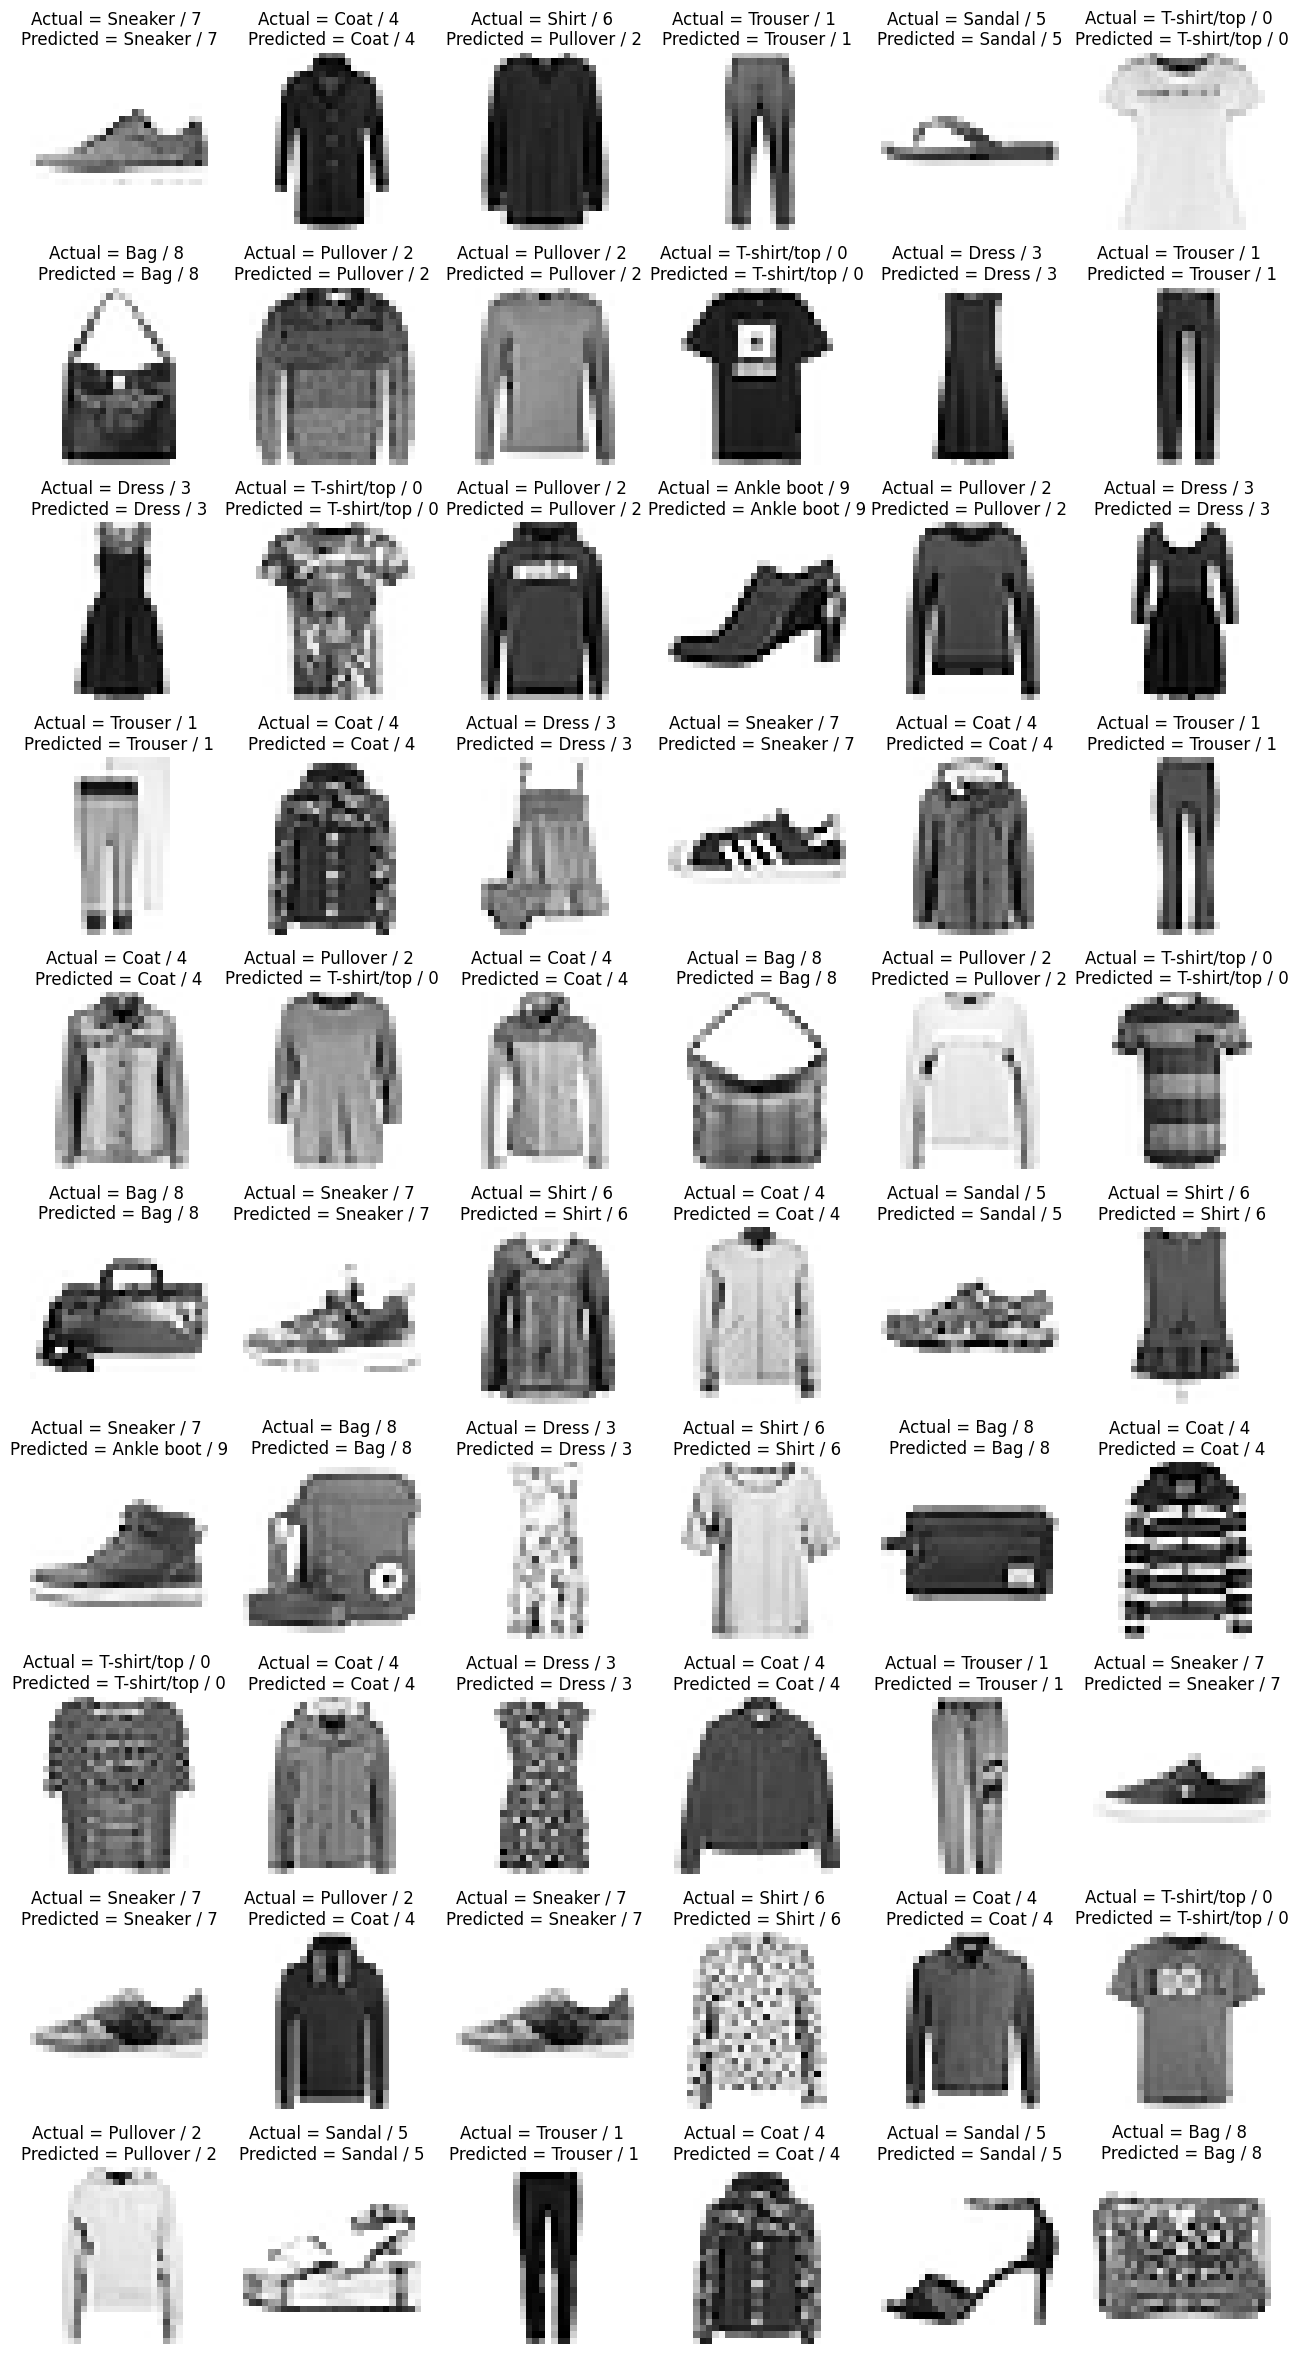

In [33]:
# Visualization
plt.figure(figsize=(16,30))
# Set a seed for reproducibility
np.random.seed(42)
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


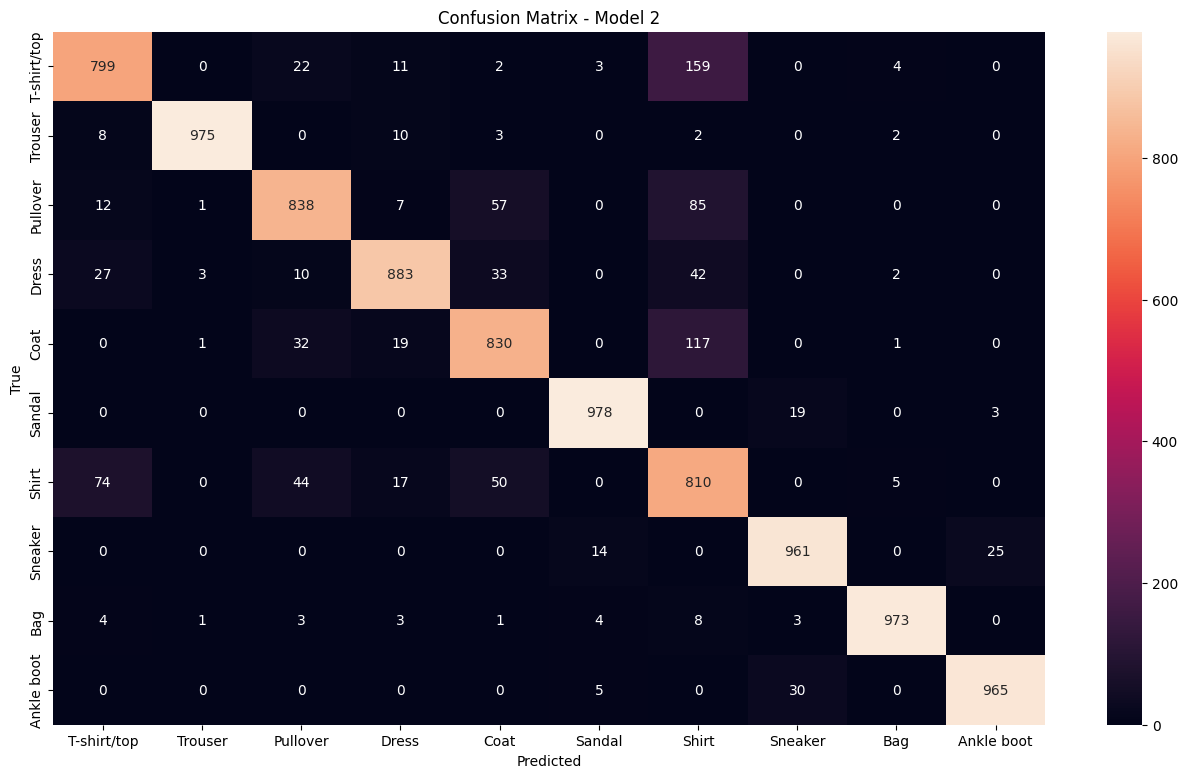

Classification Report for Model 2:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.80      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.88      0.84      0.86      1000
       Dress       0.93      0.88      0.91      1000
        Coat       0.85      0.83      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.66      0.81      0.73      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000




In [34]:
# Model 2 Confusion Matrix

y_pred_model2 = cnn_model2.predict(X_test)
y_pred_labels_model2 = [np.argmax(label) for label in y_pred_model2]
cm2 = confusion_matrix(y_test, y_pred_labels_model2)

# Plot confusion matrix for Model 2
plt.figure(figsize=(16,9))
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Model 2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report for Model 2
cr2 = classification_report(y_test, y_pred_labels_model2, target_names=class_labels)
print("Classification Report for Model 2:")
print(cr2)
print()

In [35]:
cnn_model2.save('fashion_mnist_cnn_model2.h5')

In [36]:
# Building CNN Model 3
cnn_model3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10, activation='softmax')
])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [37]:
cnn_model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
cnn_model3_history = cnn_model3.fit(X_train, y_train, epochs=30, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 45s 443ms/step - accuracy: 0.3538 - loss: 1.6649 - val_accuracy: 0.7525 - val_loss: 0.6301
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 82s 440ms/step - accuracy: 0.7544 - loss: 0.6498 - val_accuracy: 0.8164 - val_loss: 0.4771
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 85s 471ms/step - accuracy: 0.8178 - loss: 0.5023 - val_accuracy: 0.8433 - val_loss: 0.4276
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 72s 355ms/step - accuracy: 0.8458 - loss: 0.4320 - val_accuracy: 0.8506 - val_loss: 0.4111
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 426ms/step - accuracy: 0.8635 - loss: 0.3817 - val_accuracy: 0.8715 - val_loss: 0.3531
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 429ms/step - accuracy: 0.8771 - loss: 0.3465 - val_accuracy: 0.8827 - val_loss: 0.3217
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 41s 425ms/step - accuracy: 0.8844 - loss: 0.3232 - val_accuracy: 0.8894 - val_loss: 0.3077
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 40s 408ms/step - accuracy: 0.8943 - loss: 0.2955 - val_accu

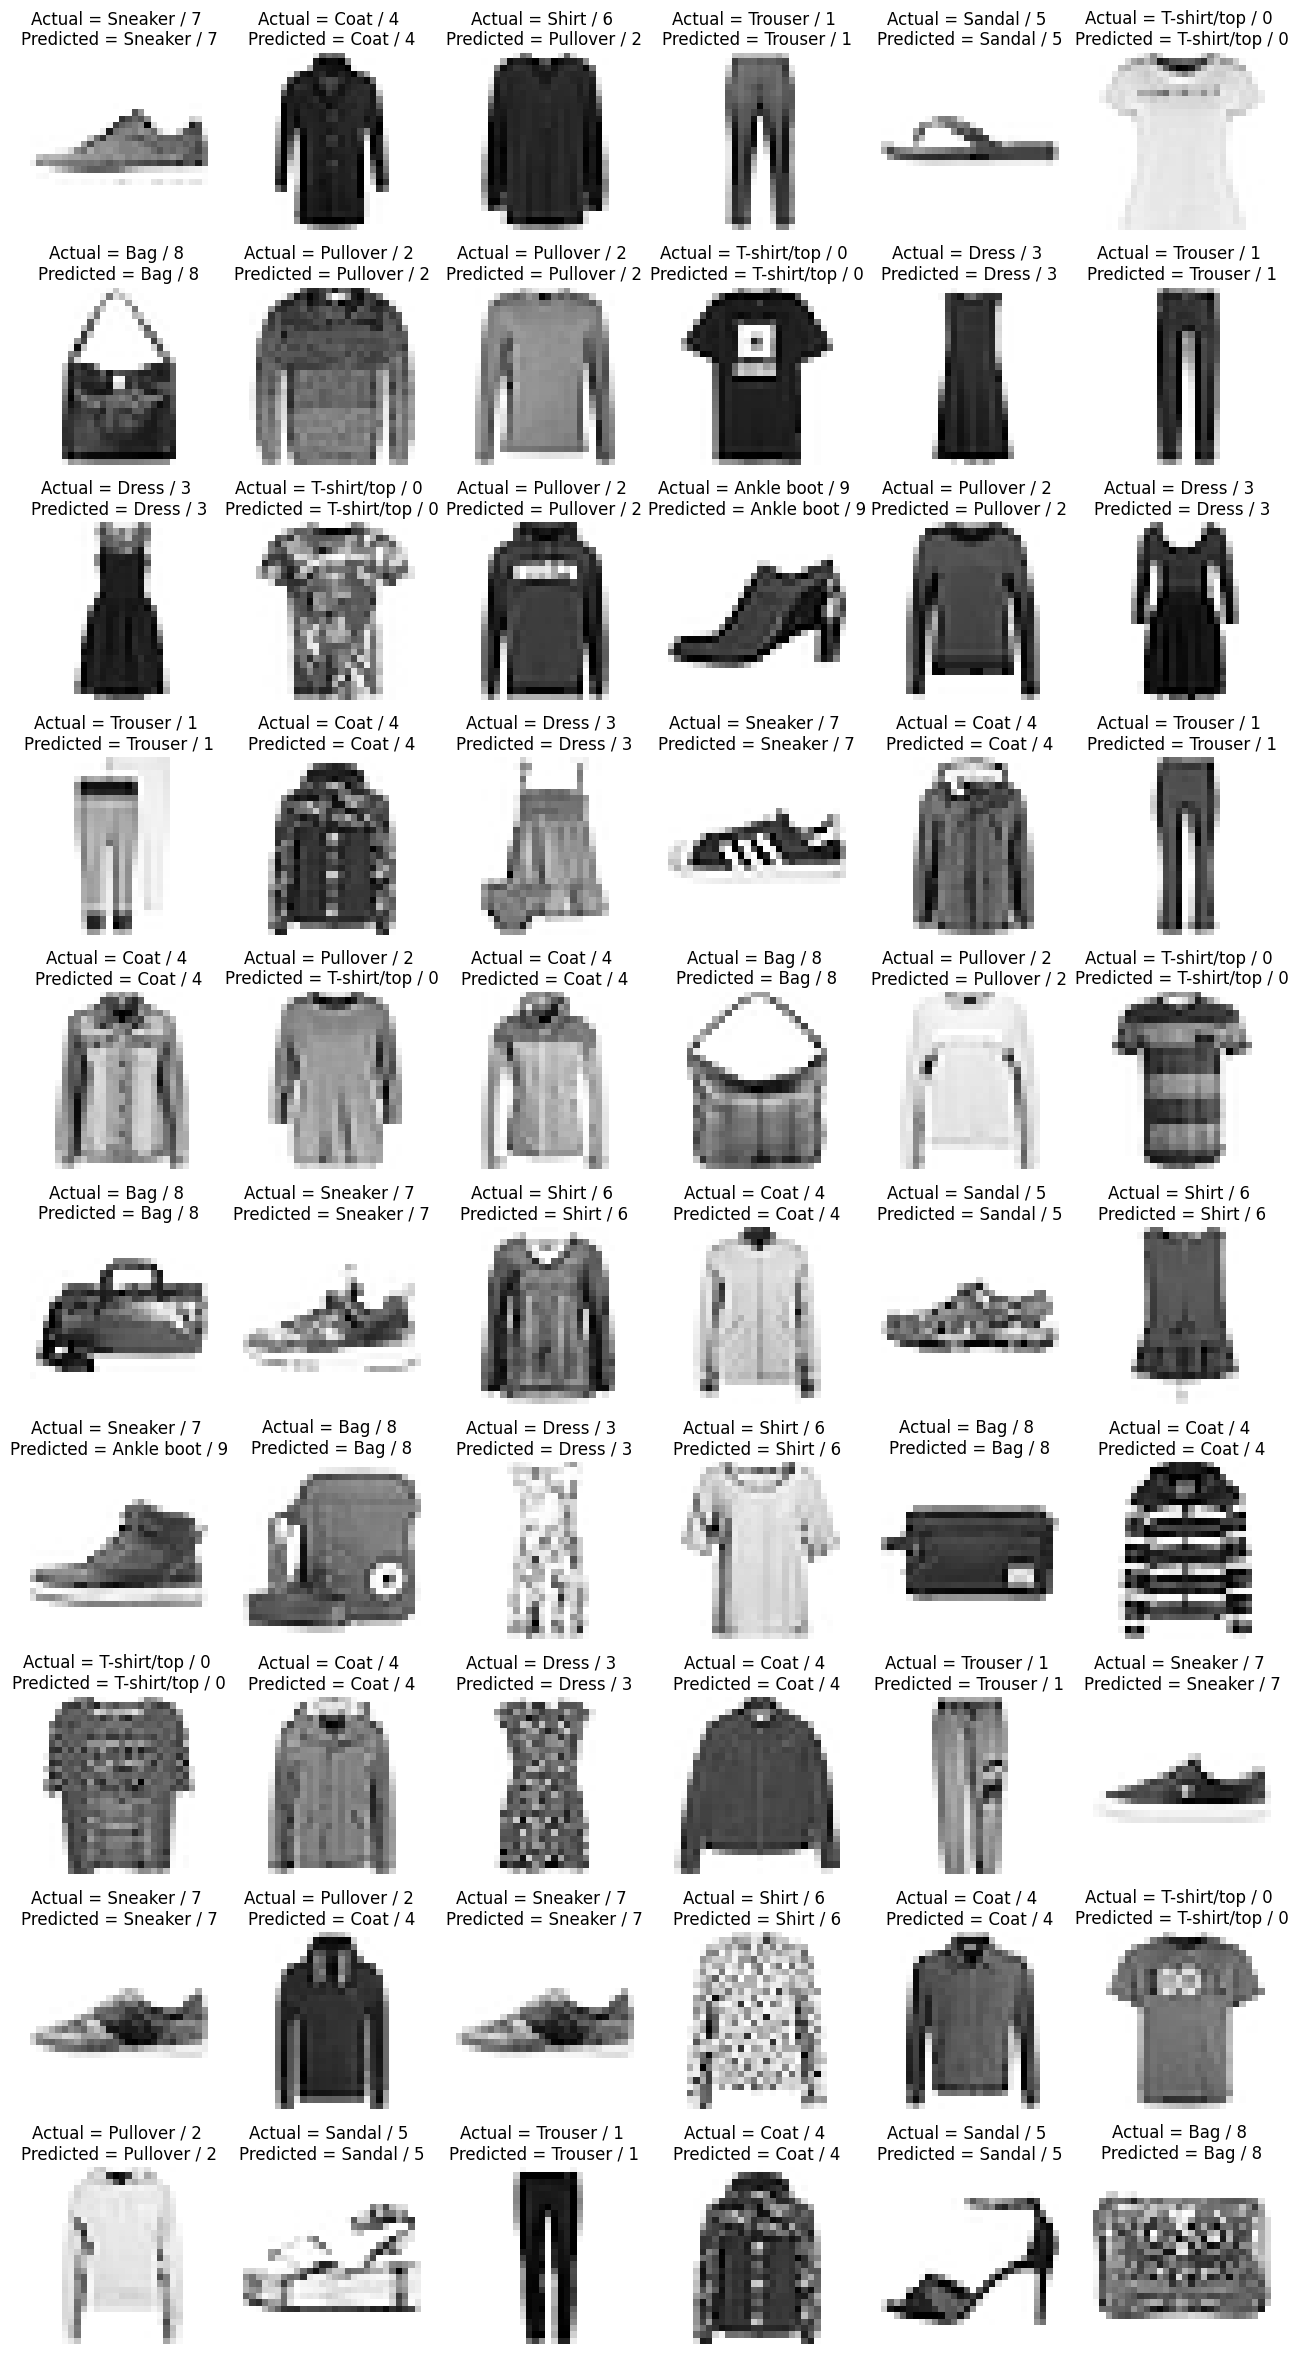

In [39]:
# Visualization
plt.figure(figsize=(16,30))
# Set a seed for reproducibility
np.random.seed(42)
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


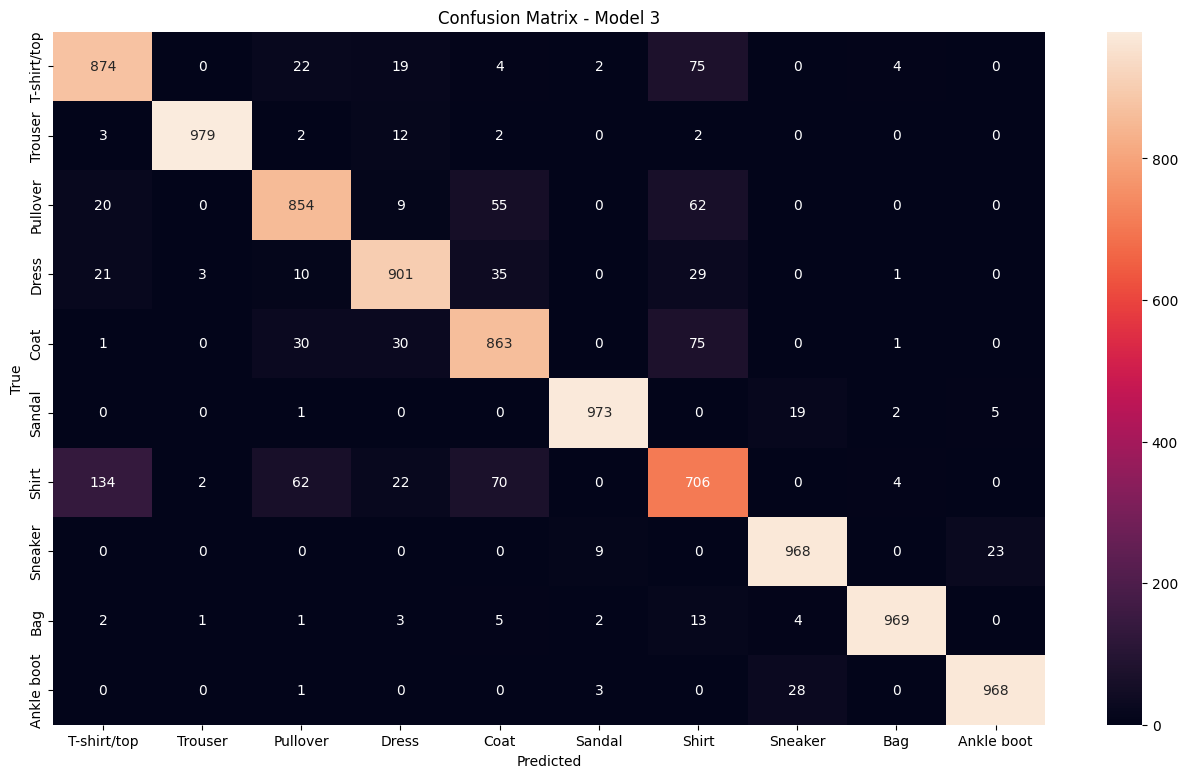

Classification Report for Model 3:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.87      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.87      0.85      0.86      1000
       Dress       0.90      0.90      0.90      1000
        Coat       0.83      0.86      0.85      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [40]:
# Model 3 Confusion Matrix:

y_pred_model3 = cnn_model3.predict(X_test)
y_pred_labels_model3 = [np.argmax(label) for label in y_pred_model3]
cm3 = confusion_matrix(y_test, y_pred_labels_model3)

# Plot confusion matrix for Model 3
plt.figure(figsize=(16,9))
sns.heatmap(cm3, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Model 3')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report for Model 3
cr3 = classification_report(y_test, y_pred_labels_model3, target_names=class_labels)
print("Classification Report for Model 3:")
print(cr3)


In [41]:
cnn_model3.save('fashion_mnist_cnn_model3.h5')

# Check comparison Between Three Models:

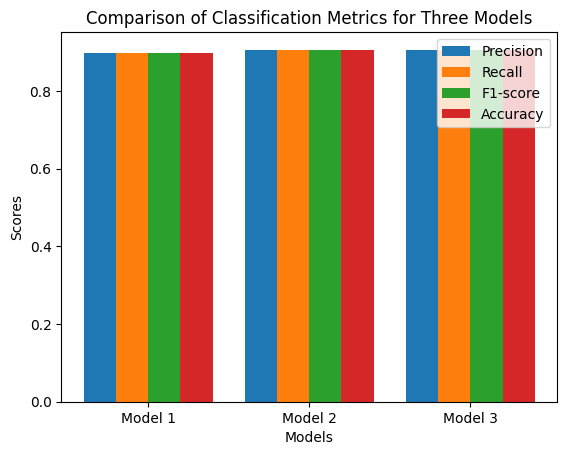

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score

# Models and their predictions
models = [(y_pred_labels_model1, "Model 1"), (y_pred_labels_model2, "Model 2"), (y_pred_labels_model3, "Model 3")]

# Initialize lists to store metrics for each model
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Iterate through each model
for y_pred_labels, model_name in models:
    # Compute classification report
    cr = classification_report(y_test, y_pred_labels, target_names=class_labels, output_dict=True)
    # Extract metrics
    precision = cr['weighted avg']['precision']
    recall = cr['weighted avg']['recall']
    f1_score = cr['weighted avg']['f1-score']
    accuracy = accuracy_score(y_test, y_pred_labels)
    # Append metrics to lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    accuracies.append(accuracy)

# Metrics to compare
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']

# Plotting
bar_width = 0.2
index = np.arange(len(models))

# Plotting each metric for each model
for i, metric in enumerate(metrics):
    plt.bar(index + i * bar_width, [precisions[i] for i in range(len(models))], bar_width, label=metric)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Classification Metrics for Three Models')
plt.xticks(index + bar_width * 1.5, [model[1] for model in models])
plt.legend()
plt.show()


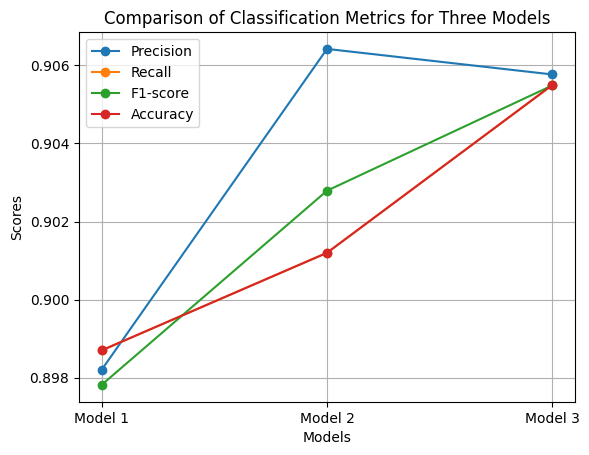

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score

# Models and their predictions
models = [(y_pred_labels_model1, "Model 1"), (y_pred_labels_model2, "Model 2"), (y_pred_labels_model3, "Model 3")]

# Initialize lists to store metrics for each model
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Iterate through each model
for y_pred_labels, model_name in models:
    # Compute classification report
    cr = classification_report(y_test, y_pred_labels, target_names=class_labels, output_dict=True)
    # Extract metrics
    precision = cr['weighted avg']['precision']
    recall = cr['weighted avg']['recall']
    f1_score = cr['weighted avg']['f1-score']
    accuracy = accuracy_score(y_test, y_pred_labels)
    # Append metrics to lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score)
    accuracies.append(accuracy)

# Metrics to compare
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']

# Plotting
index = np.arange(len(models))

plt.plot(index, precisions, marker='o', label='Precision')
plt.plot(index, recalls, marker='o', label='Recall')
plt.plot(index, f1_scores, marker='o', label='F1-score')
plt.plot(index, accuracies, marker='o', label='Accuracy')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Classification Metrics for Three Models')
plt.xticks(index, [model[1] for model in models])
plt.legend()
plt.grid(True)
plt.show()


# Transfer Learning Model using Pretrained Model